In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import ceil
from sklearn.model_selection import train_test_split
import warnings

In [2]:
!unzip './Datasets'

Archive:  ./Datasets.zip
  inflating: Datasets/Data1-blobs-2D.csv  
  inflating: Datasets/Data2-circles-2D.csv  
  inflating: Datasets/Data3-classification-2D.csv  
  inflating: Datasets/Data4-gaussian-2D.csv  
  inflating: Datasets/Data5-moon-2D.csv  
  inflating: Datasets/Data6-classification-3D.csv  
  inflating: Datasets/Data7-gaussian-3D.csv  


In [3]:
warnings.filterwarnings('ignore')

In [4]:
path = './Datasets'
learning_rate = 0.001
epochs = 200

In [5]:
dirs = os.listdir(path)

In [6]:
dirs = [[path+'/' + x , x.split('.')[0] , int(x[-6])] for x in dirs]

In [7]:
dirs = sorted(dirs)

In [8]:
dirs

[['./Datasets/Data1-blobs-2D.csv', 'Data1-blobs-2D', 2],
 ['./Datasets/Data2-circles-2D.csv', 'Data2-circles-2D', 2],
 ['./Datasets/Data3-classification-2D.csv', 'Data3-classification-2D', 2],
 ['./Datasets/Data4-gaussian-2D.csv', 'Data4-gaussian-2D', 2],
 ['./Datasets/Data5-moon-2D.csv', 'Data5-moon-2D', 2],
 ['./Datasets/Data6-classification-3D.csv', 'Data6-classification-3D', 3],
 ['./Datasets/Data7-gaussian-3D.csv', 'Data7-gaussian-3D', 3]]

In [9]:
def read_dataset(pth):
    return pd.read_csv(pth).to_numpy()

In [ ]:
def plot_org_data(dirs):
    for pth in dirs:
        if(pth[2] == 2):
            data = read_dataset(pth[0])
            ax = plt.figure().add_subplot(projection='3d')
            ax.scatter(data[:,0],data[:,1] , zs=0 , c=data[:,2])
            ax.set_title(pth[1])
        
        else :
            data = read_dataset(pth[0])
            ax = plt.figure().add_subplot(projection='3d')
            ax.scatter(data[:,0],data[:,1] , zs=data[:,2] , c=data[:,3])
            ax.set_title(pth[1])

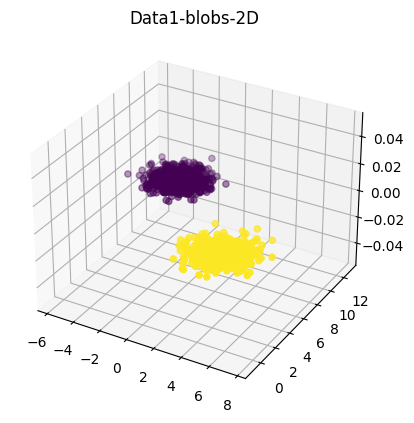

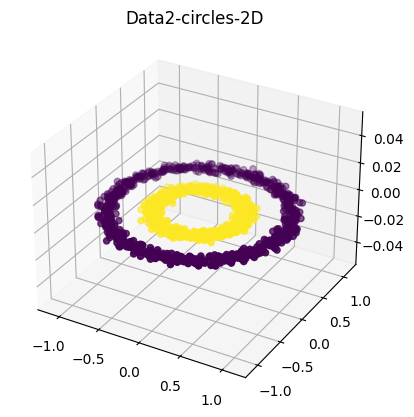

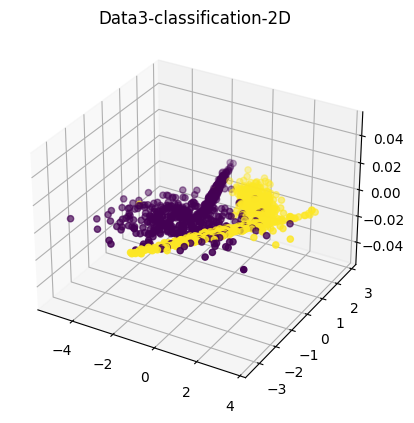

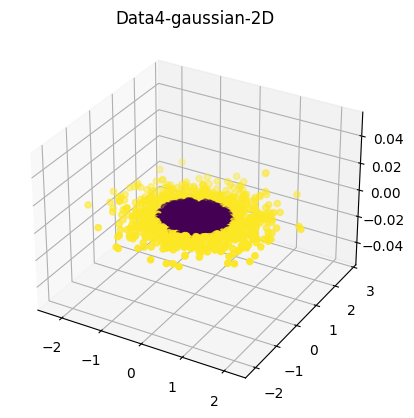

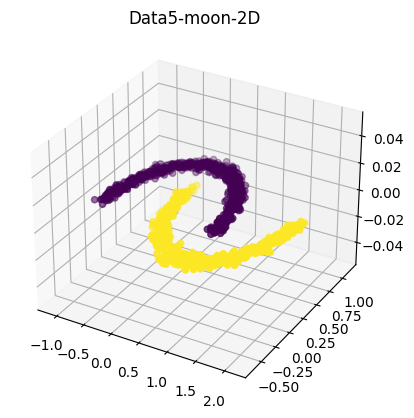

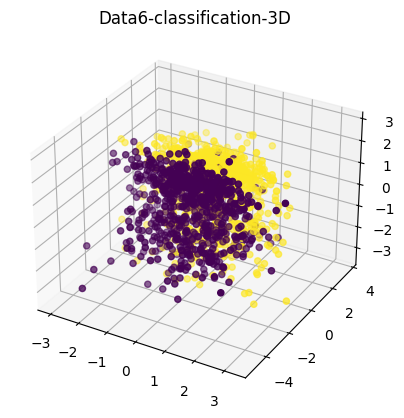

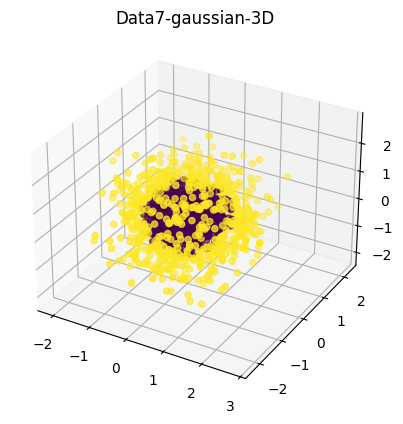

In [ ]:
plot_org_data(dirs)

In [ ]:
class LR:
    def __init__(self , x_train , y_train , x_test , y_test , epochs = 1000 , batch_size = 50 , lr = 0.001 , name="model"):
        self.x_train = np.hstack((x_train , np.ones((x_train.shape[0] , 1))))
        self.x_test  = np.hstack((x_test  , np.ones((x_test.shape[0]  , 1))))
        self.y_train = y_train
        self.y_test  = y_test
        self.epochs  = epochs
        self.batch_size = batch_size
        self.lr = lr
        self.name = name
        self.train_len = len(x_train)
        self.batch_num = ceil(self.train_len / batch_size)
        self.dim = len(x_train[0])
        np.random.seed(0)
        self.W = (np.random.rand(self.dim + 1)*2)-1 # random init weights in range [-1 , 1]
        self.log_loss = []
    
    def cost(self , y , pred):
        return -np.multiply(y,np.log(pred))-np.multiply((1-y),np.log(1-pred))


    def h(self , x):
        return 1 / (1 + np.exp(-np.matmul(x , self.W.T)))
    

    def train(self):
        batches_x = []
        batches_y = []
        for j in range(self.batch_num):
            x = self.x_train[j*self.batch_size : min((j+1)*self.batch_size , self.train_len)]
            y = self.y_train[j*self.batch_size : min((j+1)*self.batch_size , self.train_len)]
            batches_x.append(x)
            batches_y.append(y)
        for i in range(self.epochs):
            cost = 0
            for x,y in zip(batches_x,batches_y):
                pred = 1 / (1 + np.exp(-np.matmul(x , self.W.T)))
                cost += np.sum(self.cost(y,pred))
                diff = np.subtract(pred , y)
                diff = diff.reshape((diff.shape[0],1))
                dw = self.lr * np.sum(np.multiply(diff , x) , axis=0)
                self.W -= dw
            self.log_loss.append(cost/len(self.x_train))
    
        
    


    def test(self):
        pred =  ( self.h(self.x_test) > 0.5 ) == self.y_test
        acc = np.average(np.abs(pred))
        print(f"{self.name}\t\t : {acc*100}%")

    def make_plots(self):

        if(self.dim == 2):
            ax = plt.figure().add_subplot()
            ax1 = plt.figure().add_subplot(projection='3d')
            ax.scatter(self.x_train[:,0],self.x_train[:,1] , c = self.y_train)
            ax.set_title(self.name+" train and decision boundry")
            xx, yy = np.meshgrid(np.arange(np.min(self.x_train[:,0]),np.max(self.x_train[:,0]) , 0.01) , np.arange(np.min(self.x_train[:,1]),np.max(self.x_train[:,1]) , 0.01) )
            data = np.c_[xx.ravel(), yy.ravel()]
            data = np.hstack((data,np.ones((data.shape[0],1))))
            prediction = self.h(data)
            ax1.scatter(data[:,0],data[:,1] , zs=prediction , c = prediction)
            prediction = prediction.reshape(xx.shape)
            prediction = prediction > 0.5
            ax.contour(xx, yy, prediction)

        else:


            ax1 = plt.figure().add_subplot(projection='3d')

            xx, yy , zz = np.meshgrid(np.arange(np.min(self.x_train[:,0]),np.max(self.x_train[:,0]) , 0.05) , 
                                      np.arange(np.min(self.x_train[:,1]),np.max(self.x_train[:,1]) , 0.05) ,
                                      np.arange(np.min(self.x_train[:,2]),np.max(self.x_train[:,2]) , 0.05) )
            data = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
            data = np.hstack((data,np.ones((data.shape[0],1))))
            prediction = self.h(data)
            ax1.scatter(data[:,0],data[:,1] , zs=data[:,2] , c = prediction , alpha = 0.01)

            

        ax2 = plt.figure().add_subplot()
        temp = [i for i in range(1,self.epochs+1)]
        ax2.scatter(temp,self.log_loss)



Data1-blobs-2D		 : 100.0%
Weights :  [ 2.20997251 -0.58673084  0.45884982]


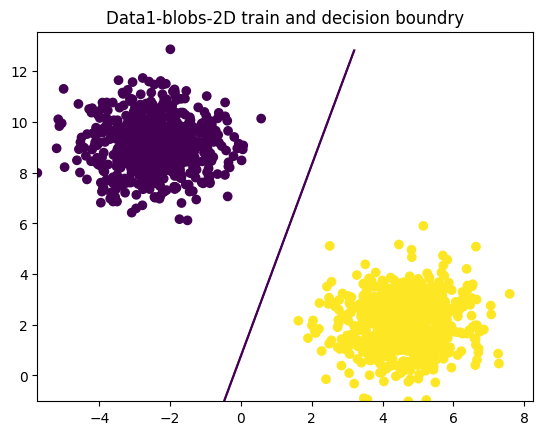

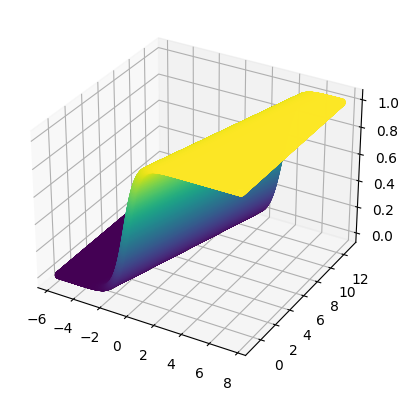

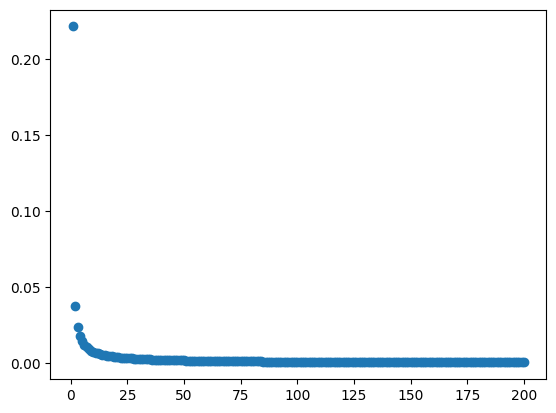

In [ ]:
data = read_dataset(dirs[0][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
lr = LR(x_train , y_train , x_test , y_test , epochs = epochs , lr=learning_rate , name=dirs[0][1])
lr.train()
lr.test()
lr.make_plots()
print("Weights : " , lr.W)

Data2-circles-2D		 : 50.66666666666667%
Weights :  [ 0.03721416 -0.02310496  0.01474295]


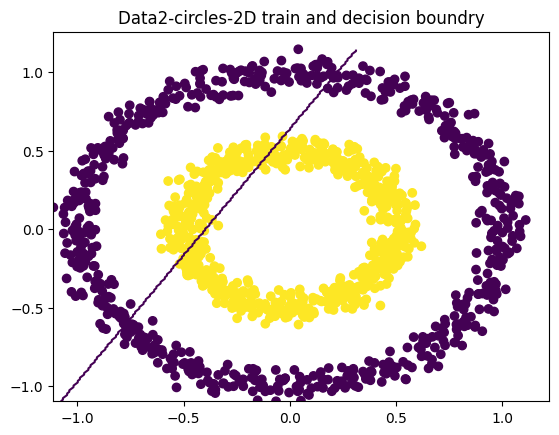

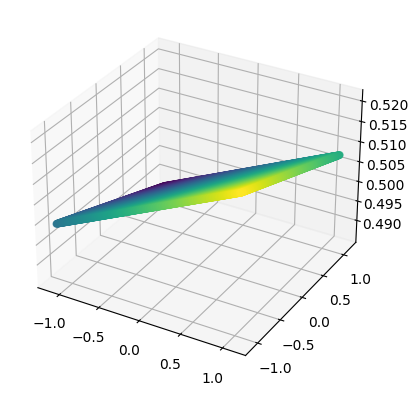

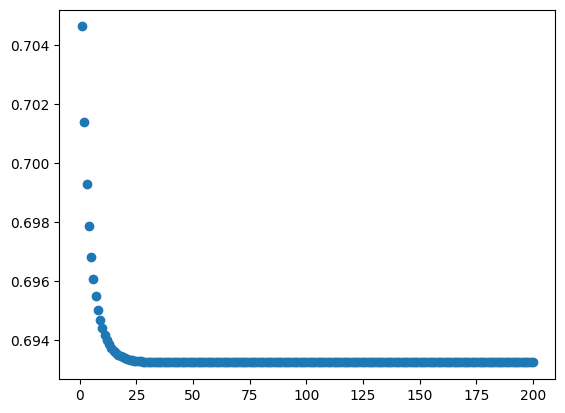

In [ ]:
data = read_dataset(dirs[1][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
lr = LR(x_train , y_train , x_test , y_test , epochs = epochs , lr=learning_rate , name=dirs[1][1])
lr.train()
lr.test()
lr.make_plots()
print("Weights : " , lr.W)

Data3-classification-2D		 : 90.0%
Weights :  [ 2.24907759 -0.16232176  0.08717961]


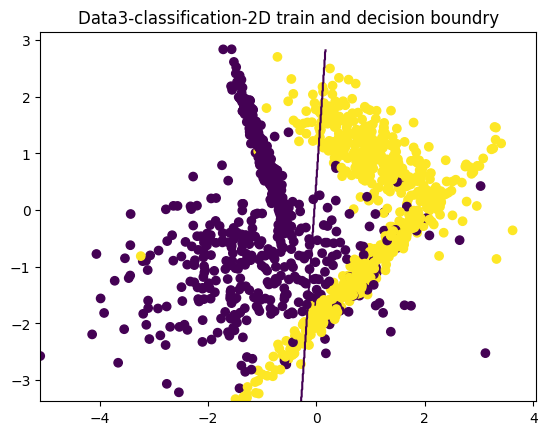

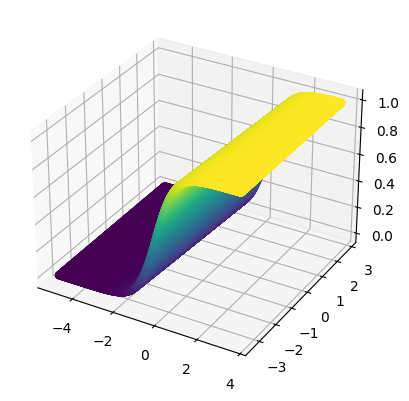

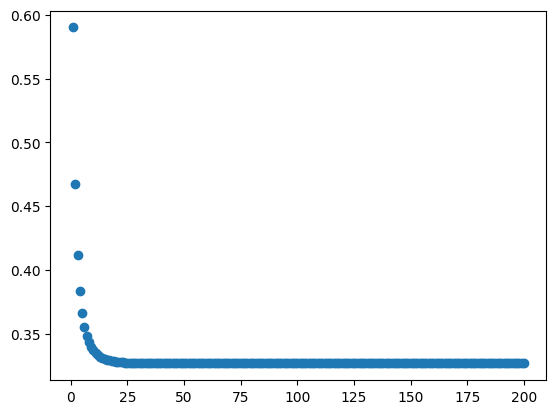

In [ ]:
data = read_dataset(dirs[2][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
lr = LR(x_train , y_train , x_test , y_test , epochs = epochs , lr=learning_rate , name=dirs[2][1])
lr.train()
lr.test()
lr.make_plots()
print("Weights : " , lr.W)

Data4-gaussian-2D		 : 44.666666666666664%
Weights :  [0.08651745 0.10545265 0.01144994]


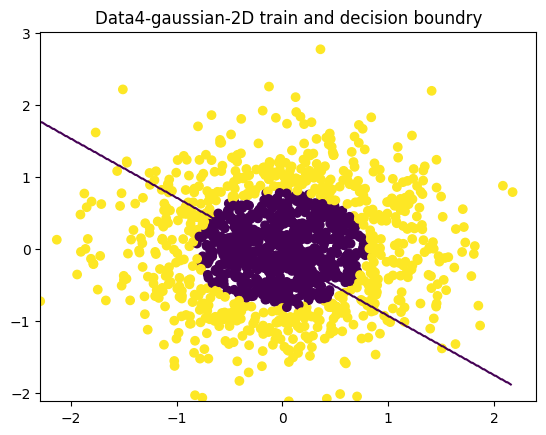

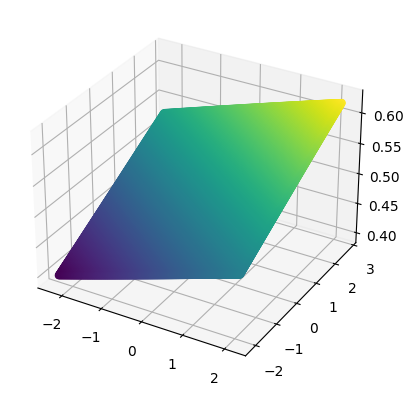

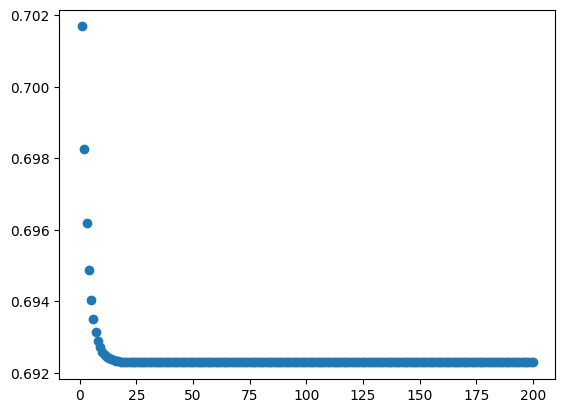

In [ ]:
data = read_dataset(dirs[3][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
lr = LR(x_train , y_train , x_test , y_test , epochs = epochs , lr=learning_rate , name=dirs[3][1])
lr.train()
lr.test()
lr.make_plots()
print("Weights : " , lr.W)

Data5-moon-2D		 : 90.0%
Weights :  [ 1.11972276 -5.67602655  0.89371498]


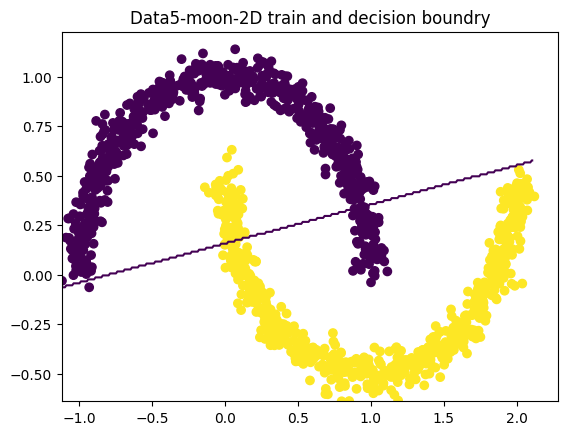

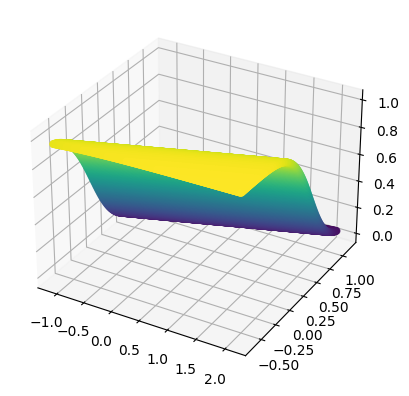

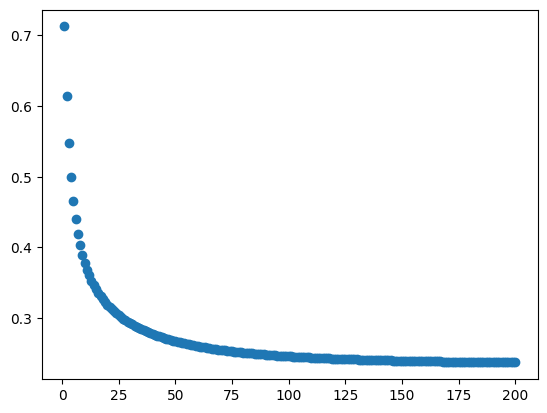

In [ ]:
data = read_dataset(dirs[4][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
lr = LR(x_train , y_train , x_test , y_test , epochs = epochs , lr=learning_rate , name=dirs[4][1])
lr.train()
lr.test()
lr.make_plots()
print("Weights : " , lr.W)

Data6-classification-3D		 : 84.66666666666667%
Weights :  [ 0.10791217  2.30232502 -0.17668858  0.03956143]


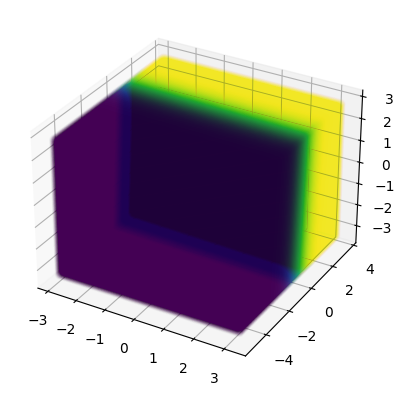

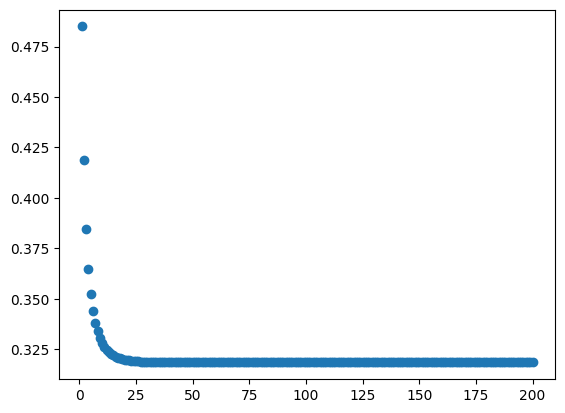

In [ ]:
data = read_dataset(dirs[5][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
lr = LR(x_train , y_train , x_test , y_test , epochs = epochs , lr=learning_rate , name=dirs[5][1])
lr.train()
lr.test()
lr.make_plots()
print("Weights : " , lr.W)

Data7-gaussian-3D		 : 56.00000000000001%
Weights :  [ 0.06627558  0.02491636  0.05044815 -0.01017018]


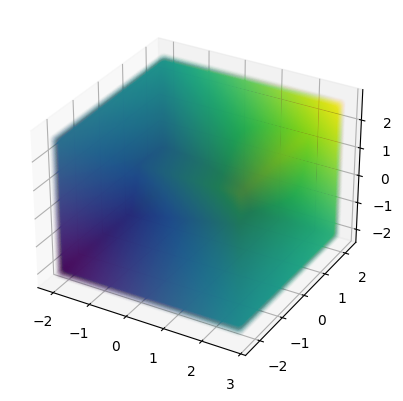

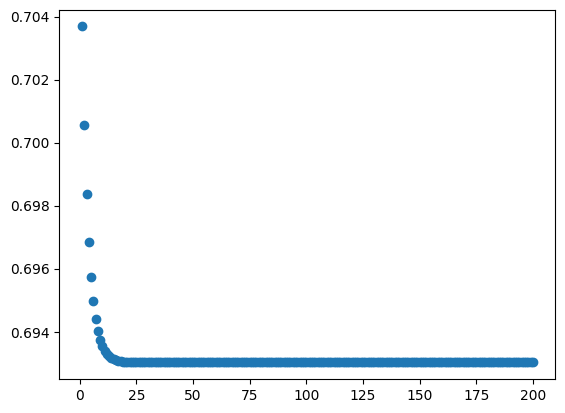

In [ ]:
data = read_dataset(dirs[6][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
lr = LR(x_train , y_train , x_test , y_test , epochs = epochs , lr=learning_rate , name=dirs[6][1])
lr.train()
lr.test()
lr.make_plots()
print("Weights : " , lr.W)

In [12]:
from sklearn.preprocessing import PolynomialFeatures

class LR_nonlinear:
    def __init__(self , x_train , y_train , x_test , y_test , epochs = 1000 , batch_size = 50 , lr = 0.001 , name="model" , d = 1):
        if(d == 1) :
          self.x_train = np.hstack((x_train , np.ones((x_train.shape[0] , 1))))
          self.x_test  = np.hstack((x_test  , np.ones((x_test.shape[0]  , 1))))
        else:
          poly = PolynomialFeatures(degree = d, interaction_only=False, include_bias=False)
          self.x_train = np.hstack((poly.fit_transform(x_train) , np.ones((x_train.shape[0] , 1))))
          self.x_test  = np.hstack((poly.fit_transform(x_test)  , np.ones((x_test.shape[0]  , 1))))
        self.d = d
        self.y_train = y_train
        self.y_test  = y_test
        self.epochs  = epochs
        self.batch_size = batch_size
        self.lr = lr
        self.name = name
        self.train_len = len(x_train)
        self.batch_num = ceil(self.train_len / batch_size)
        self.dim = len(x_train[0])
        np.random.seed(0)
        self.W = (np.random.rand(len(self.x_train[0]))*2)-1 # random init weights in range [-1 , 1]
        self.log_loss = []
    
    def cost(self , y , pred):
        return -np.multiply(y,np.log(pred))-np.multiply((1-y),np.log(1-pred))


    def h(self , x):
        return 1 / (1 + np.exp(-np.matmul(x , self.W.T)))
    

    def train(self):
        batches_x = []
        batches_y = []
        for j in range(self.batch_num):
            x = self.x_train[j*self.batch_size : min((j+1)*self.batch_size , self.train_len)]
            y = self.y_train[j*self.batch_size : min((j+1)*self.batch_size , self.train_len)]
            batches_x.append(x)
            batches_y.append(y)
        for i in range(self.epochs):
            cost = 0
            for x,y in zip(batches_x,batches_y):
                pred = 1 / (1 + np.exp(-np.matmul(x , self.W.T)))
                cost += np.sum(self.cost(y,pred))
                diff = np.subtract(pred , y)
                diff = diff.reshape((diff.shape[0],1))
                dw = self.lr * np.sum(np.multiply(diff , x) , axis=0)
                self.W -= dw
            self.log_loss.append(cost/len(self.x_train))
    
        
    


    def test(self):
        pred =  ( self.h(self.x_test) > 0.5 ) == self.y_test
        acc = np.average(np.abs(pred))
        print(f"{self.name}\t\t : {acc*100}%")

    def make_plots(self):
        
       
        if(self.dim == 2):
            ax = plt.figure().add_subplot()
            ax1 = plt.figure().add_subplot(projection='3d')
            ax.scatter(self.x_train[:,0],self.x_train[:,1] , c = self.y_train)
            ax.set_title(self.name+" train and decision boundry")
            xx, yy = np.meshgrid(np.arange(np.min(self.x_train[:,0]),np.max(self.x_train[:,0]) , 0.01) , np.arange(np.min(self.x_train[:,1]),np.max(self.x_train[:,1]) , 0.01) )
            data = np.c_[xx.ravel(), yy.ravel()]
            if(self.d > 1):
              poly = PolynomialFeatures(degree = self.d, interaction_only=False, include_bias=False)
              data = poly.fit_transform(data)
            data = np.hstack((data,np.ones((data.shape[0],1))))
            prediction = self.h(data)
            ax1.scatter(data[:,0],data[:,1] , zs=prediction , c = prediction)
            prediction = prediction.reshape(xx.shape)
            prediction = prediction > 0.5
            ax.contour(xx, yy, prediction)

        else:
            ax1 = plt.figure().add_subplot(projection='3d')
            
            xx, yy , zz = np.meshgrid(np.arange(np.min(self.x_train[:,0]),np.max(self.x_train[:,0]) , 0.05) , 
                                      np.arange(np.min(self.x_train[:,1]),np.max(self.x_train[:,1]) , 0.05) ,
                                      np.arange(np.min(self.x_train[:,2]),np.max(self.x_train[:,2]) , 0.05) )
            data = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
            if(self.d > 1):
              poly = PolynomialFeatures(degree = self.d, interaction_only=False, include_bias=False)
              data = poly.fit_transform(data)
            data = np.hstack((data,np.ones((data.shape[0],1))))
            prediction = self.h(data)
            ax1.scatter(data[:,0],data[:,1] , zs=data[:,2] , c = prediction , alpha = 0.01)

            

        ax2 = plt.figure().add_subplot()
        temp = [i for i in range(1,self.epochs+1)]
        ax2.scatter(temp,self.log_loss)



Data1-blobs-2D		 : 100.0%
Weights :  [ 0.26843212  0.48978298  0.58964964  0.41316357 -0.19270898  0.34952702]


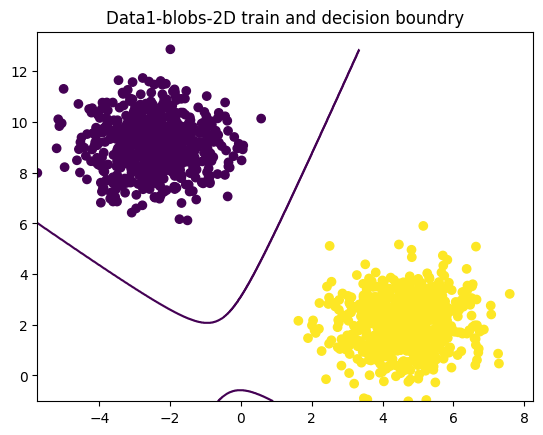

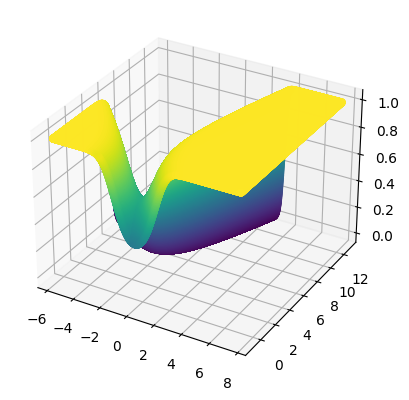

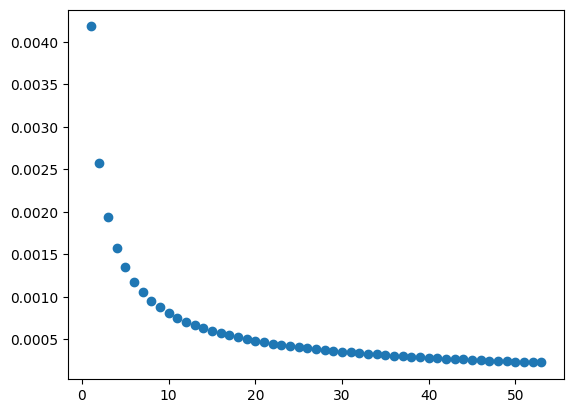

In [ ]:
data = read_dataset(dirs[0][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
lr = LR_nonlinear(x_train , y_train , x_test , y_test , epochs = epochs , lr=learning_rate , name=dirs[0][1] , d = 2)
lr.train()
lr.test()
lr.make_plots()
print("Weights : " , lr.W)

Data2-circles-2D		 : 100.0%
Weights :  [-1.07393906e-01 -4.64764639e-02 -7.00289881e+00 -1.41599770e-03
 -7.12080487e+00  1.26817592e-01 -5.05453357e-02  4.48221354e-01
  1.14071798e-01  4.28419462e+00]


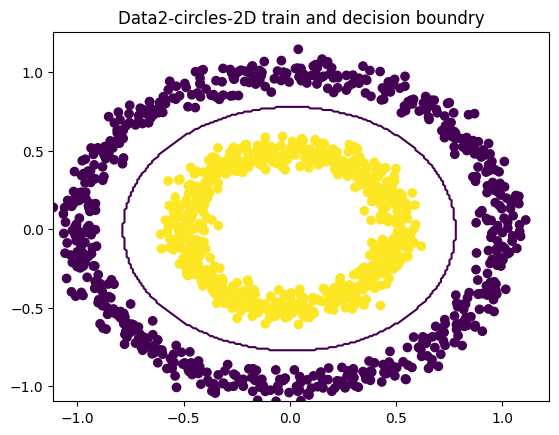

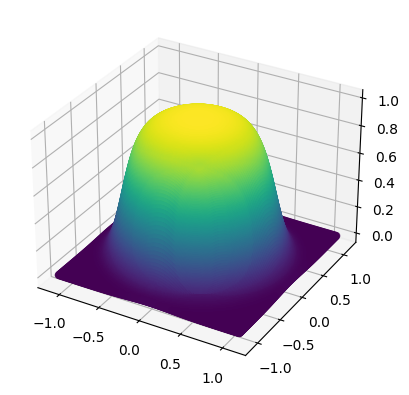

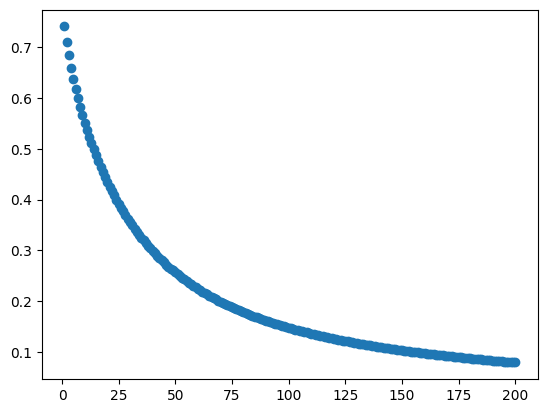

In [ ]:
data = read_dataset(dirs[1][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
lr = LR_nonlinear(x_train , y_train , x_test , y_test , epochs = epochs , lr=learning_rate , name=dirs[1][1] , d = 3)
lr.train()
lr.test()
lr.make_plots()
print("Weights : " , lr.W)

Data3-classification-2D		 : 94.66666666666667%
Weights :  [ 3.87251015  0.61484216 -0.39110106  1.0378374   1.20373491 -0.15335549
  0.13939572  0.2023552   0.07581628 -1.51293563]


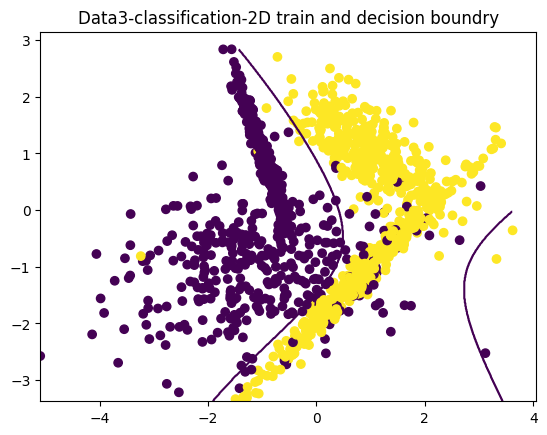

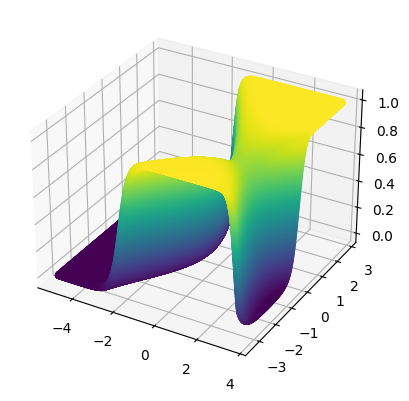

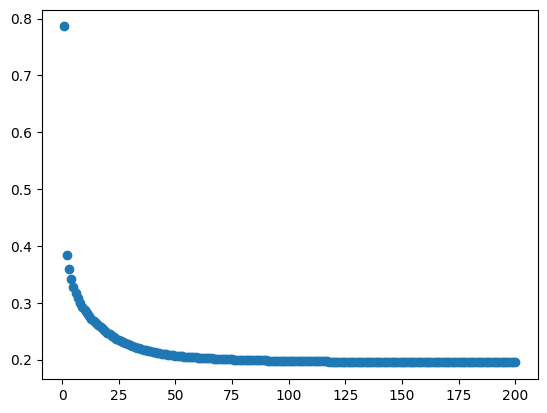

In [ ]:
data = read_dataset(dirs[2][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
lr = LR_nonlinear(x_train , y_train , x_test , y_test , epochs = epochs , lr=learning_rate , name=dirs[2][1] , d = 3)
lr.train()
lr.test()
lr.make_plots()
print("Weights : " , lr.W)

Data4-gaussian-2D		 : 98.66666666666667%
Weights :  [ 0.11398641  0.03554983  5.61523258 -0.14967477  6.13679408 -4.11447037]


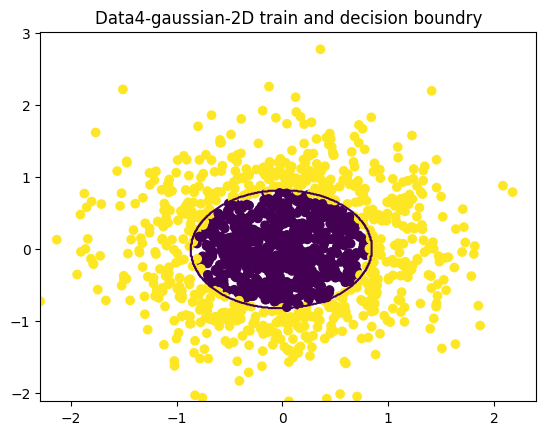

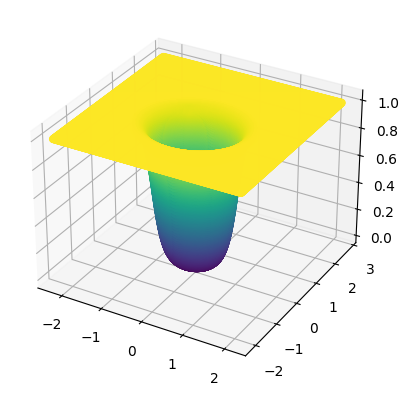

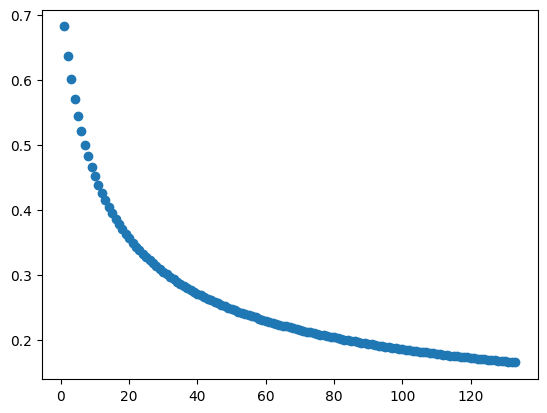

In [ ]:
data = read_dataset(dirs[3][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
lr = LR_nonlinear(x_train , y_train , x_test , y_test , epochs = epochs , lr=learning_rate , name=dirs[3][1] , d = 2)
lr.train()
lr.test()
lr.make_plots()
print("Weights : " , lr.W)

Data5-moon-2D		 : 98.66666666666667%
Weights :  [-1.30814141 -3.55848602 -3.93087452 -1.67627099 -1.76047285  3.15325522
 -2.20496212  0.99030009 -1.42623654  2.49379451]


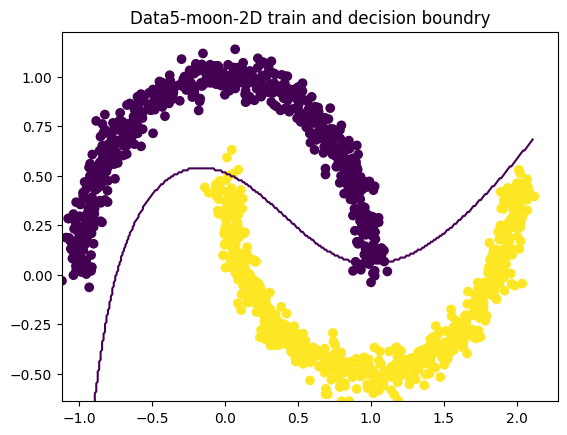

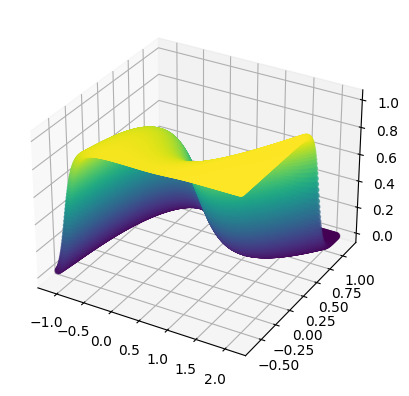

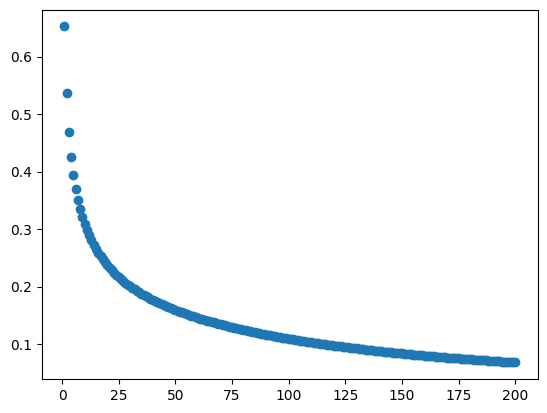

In [ ]:
data = read_dataset(dirs[4][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
lr = LR_nonlinear(x_train , y_train , x_test , y_test , epochs = epochs , lr=learning_rate , name=dirs[4][1] , d = 3)
lr.train()
lr.test()
lr.make_plots()
print("Weights : " , lr.W)

Data6-classification-3D		 : 92.66666666666666%
Weights :  [ 0.24860693  4.15002658  0.65909694  0.09400714 -0.38425795 -0.03809531
 -1.8467068   0.46550526  1.00661947  0.04892776  0.12517897  0.02165995
  0.47523996  0.38888799 -0.21601199  0.40150066  0.2951398  -0.27867355
 -0.01731658 -0.98423222]


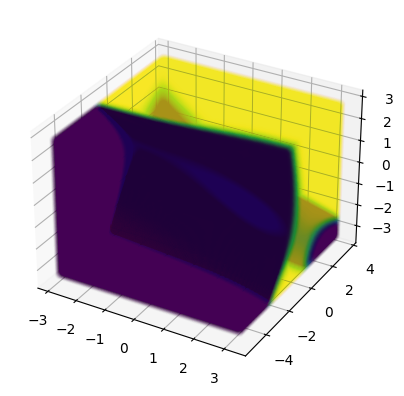

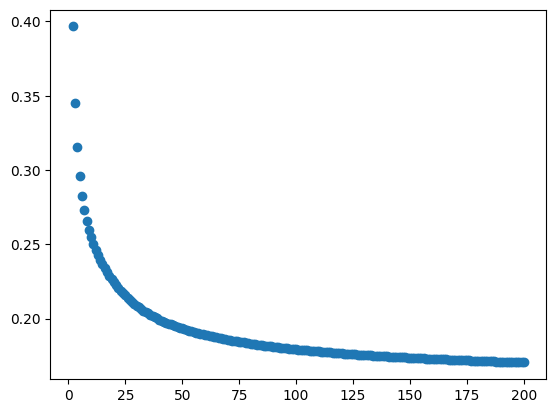

In [ ]:
data = read_dataset(dirs[5][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
lr = LR_nonlinear(x_train , y_train , x_test , y_test , epochs = epochs , lr=learning_rate , name=dirs[5][1] , d = 3)
lr.train()
lr.test()
lr.make_plots()
print("Weights : " , lr.W)

Data7-gaussian-3D		 : 98.0%
Weights :  [ 0.197706    0.1709314   0.051598    4.3688078   0.05187283 -0.23082749
  4.42685208  0.05602442  4.49856536 -0.07767013  0.07649286  0.04035347
  0.01049425  0.3542917  -0.23284607 -0.17929181 -0.22392523  0.11521607
  0.1609951  -5.30201295]


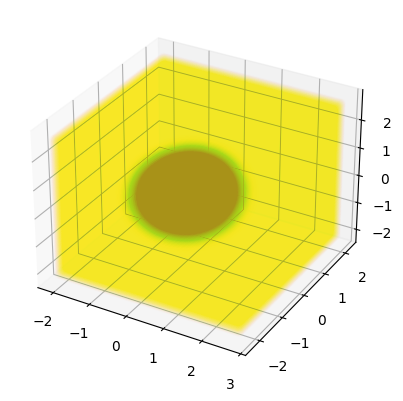

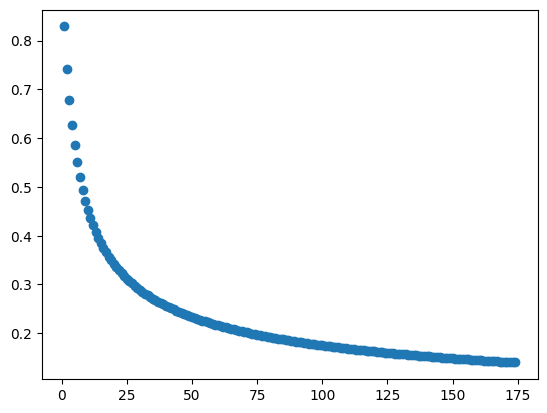

In [ ]:
data = read_dataset(dirs[6][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
lr = LR_nonlinear(x_train , y_train , x_test , y_test , epochs = epochs , lr=learning_rate , name=dirs[6][1] , d = 3)
lr.train()
lr.test()
lr.make_plots()
print("Weights : " , lr.W)

In [10]:
!pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 4.0 MB/s eta 0:00:00


In [11]:
import pygad

In [13]:
def GA(x_train , y_train , x_test , y_test , d , dim , num_generations = 100 , num_parents_mating = 4 , sol_per_pop = 100 , mutation_percent_genes = 5):
    if(d == 1) :
        xx_train = np.hstack((x_train , np.ones((x_train.shape[0] , 1))))
        xx_test  = np.hstack((x_test  , np.ones((x_test.shape[0]  , 1))))
    else:
      poly = PolynomialFeatures(degree = d, interaction_only=False, include_bias=False)
      xx_train = np.hstack((poly.fit_transform(x_train) , np.ones((x_train.shape[0] , 1))))
      xx_test  = np.hstack((poly.fit_transform(x_test)  , np.ones((x_test.shape[0]  , 1))))

    def h(x,w):
        return 1 / (1 + np.exp(-np.matmul(x , w.T)))

    def fitness_func(ga_instance, solution, solution_idx):
      output = h(xx_train , np.array(solution))
      fitness = 1 - np.average(np.abs(np.subtract(y_train , output)))
      return fitness

    fitness_function = fitness_func
    num_genes = len(xx_train[0])
    init_range_low = -2
    init_range_high = 2
    parent_selection_type = "sss"
    keep_parents = 1
    crossover_type = "single_point"
    mutation_type = "random"
    

    ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)
    ga_instance.run()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    output = h(xx_test , np.array(solution)) > 0.5
    test_fitness = np.average(y_test == output)
    print("Weights : ",solution , "\n" , "accuracy : " , test_fitness)
    ga_instance.plot_fitness()

    if(dim == 2):
        ax = plt.figure().add_subplot()
        ax1 = plt.figure().add_subplot(projection='3d')
        ax.scatter(xx_train[:,0],xx_train[:,1] , c = y_train)
        ax.set_title("decision boundry")
        xx, yy = np.meshgrid(np.arange(np.min(xx_train[:,0]),np.max(xx_train[:,0]) , 0.01) , 
                  np.arange(np.min(xx_train[:,1]),np.max(xx_train[:,1]) , 0.01) )
        data = np.c_[xx.ravel(), yy.ravel()]
        if(d > 1):
          poly = PolynomialFeatures(degree = d, interaction_only=False, include_bias=False)
          data = poly.fit_transform(data)
        data = np.hstack((data,np.ones((data.shape[0],1))))
        prediction = h(data,solution)
        ax1.scatter(data[:,0],data[:,1] , zs=prediction , c = prediction)
        prediction = prediction.reshape(xx.shape)
        prediction = prediction > 0.5
        ax.contour(xx, yy, prediction)

    else:
 
        ax1 = plt.figure().add_subplot(projection='3d')
        
        xx, yy , zz = np.meshgrid(np.arange(np.min(xx_train[:,0]),np.max(xx_train[:,0]) , 0.05) , 
                                  np.arange(np.min(xx_train[:,1]),np.max(xx_train[:,1]) , 0.05) ,
                                  np.arange(np.min(xx_train[:,2]),np.max(xx_train[:,2]) , 0.05) )
        data = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
        if(d > 1):
          poly = PolynomialFeatures(degree = d, interaction_only=False, include_bias=False)
          data = poly.fit_transform(data)
        data = np.hstack((data,np.ones((data.shape[0],1))))
        prediction = h(data,solution)
        ax1.scatter(data[:,0],data[:,1] , zs=data[:,2] , c = prediction , alpha = 0.01)
        


Weights :  [ 3.77333082  0.56176853  4.65875797  7.9308489  -3.92901397  3.76499577] 
 accuracy :  1.0


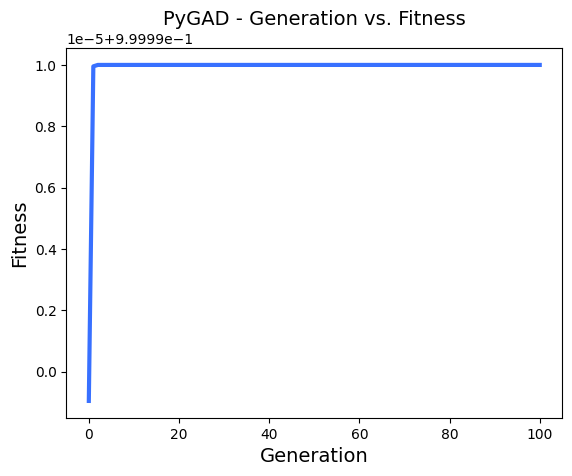

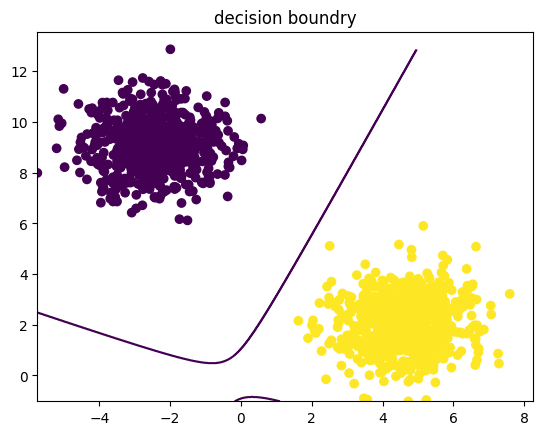

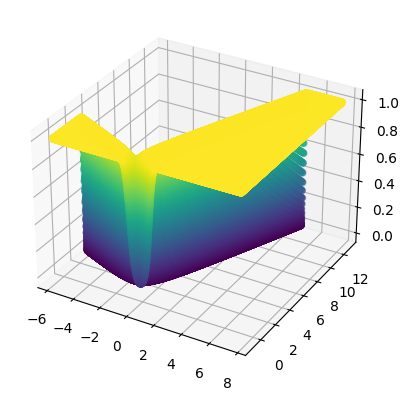

In [ ]:
data = read_dataset(dirs[0][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
GA(x_train , y_train , x_test , y_test , 2 ,dirs[0][-1])

Weights :  [  0.17416566  -0.36666487 -30.10549904  -0.118352   -30.22163667
  -0.26141033   1.58255554   1.52874016  -0.17669012  17.85165619] 
 accuracy :  1.0


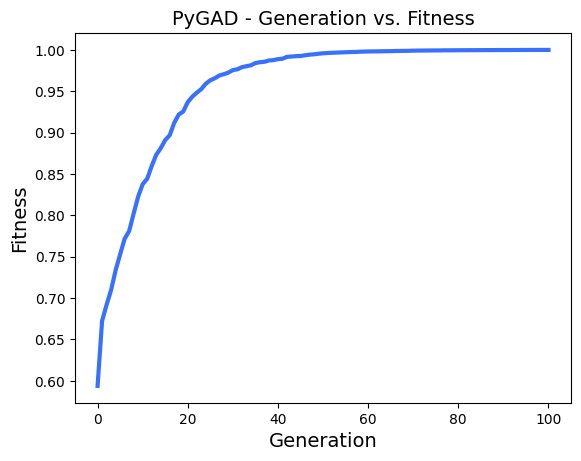

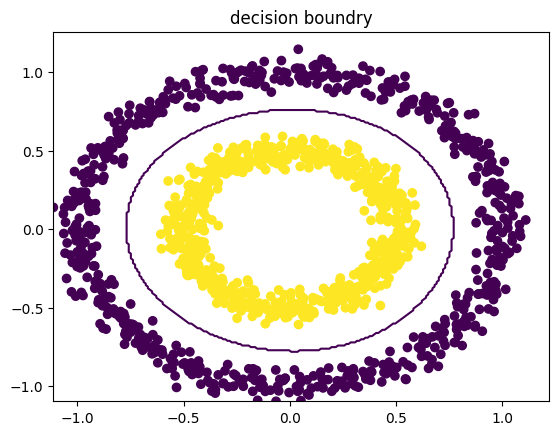

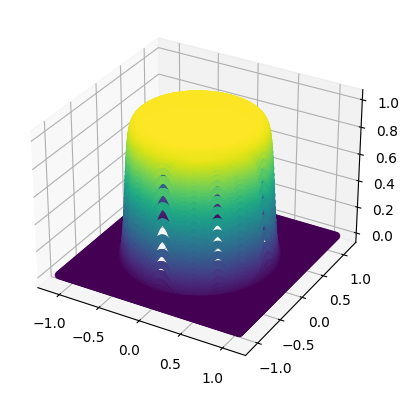

In [14]:
data = read_dataset(dirs[1][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
GA(x_train , y_train , x_test , y_test , 3,dirs[1][-1])

Weights :  [ 9.36055612  4.83761248  1.03899746 -1.89458825  4.66665765  3.99807645
 -0.13537887  1.31044688 -0.75519789 -7.09061327] 
 accuracy :  0.96


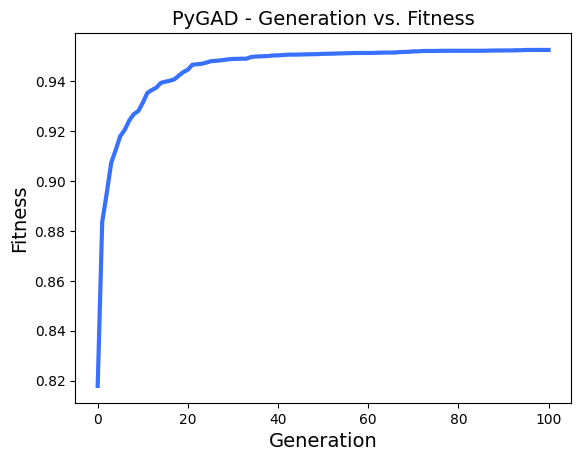

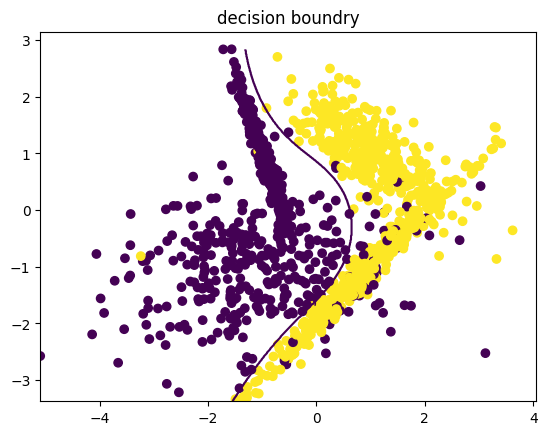

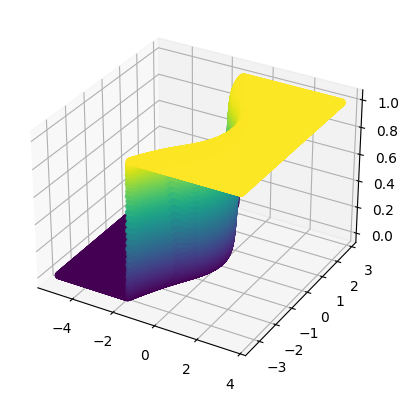

In [15]:
data = read_dataset(dirs[2][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
GA(x_train , y_train , x_test , y_test , 3,dirs[2][-1])

Weights :  [  0.20525643   0.10461332  24.903964    -0.20773363  26.1311239
 -16.63136976] 
 accuracy :  0.9933333333333333


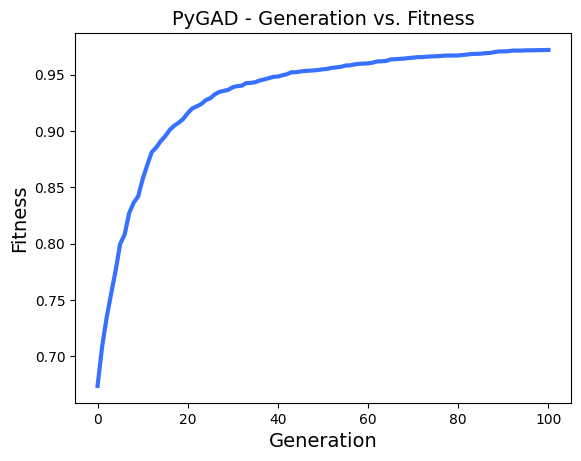

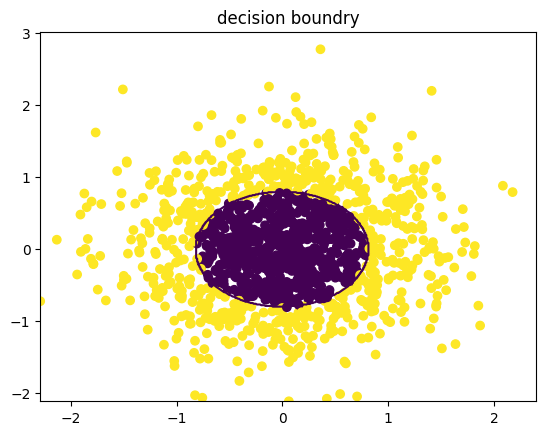

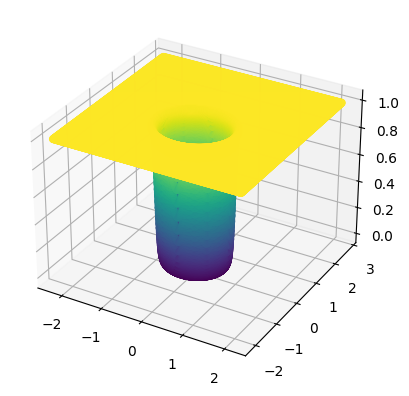

In [16]:
data = read_dataset(dirs[3][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
GA(x_train , y_train , x_test , y_test , 2 ,dirs[3][-1])

Weights :  [ -6.16687403  -4.83557075 -10.75300146  -3.82023557   0.77063803
   8.06269668  -5.06760284  12.84342988 -10.5334809    6.30903382] 
 accuracy :  1.0


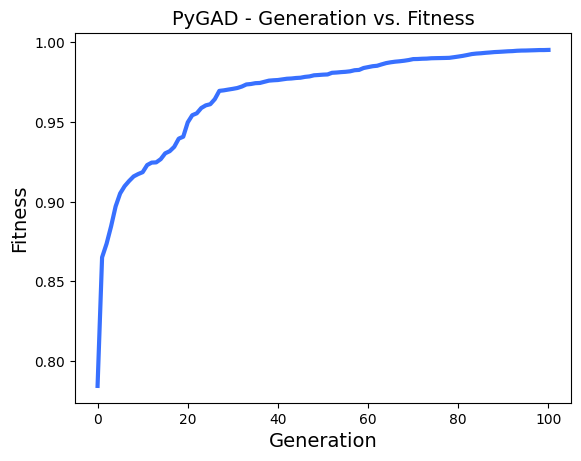

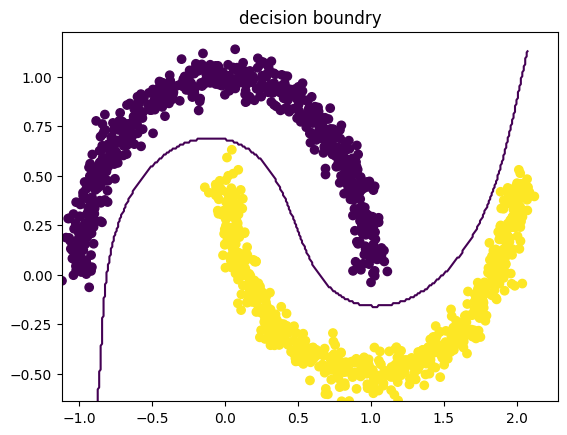

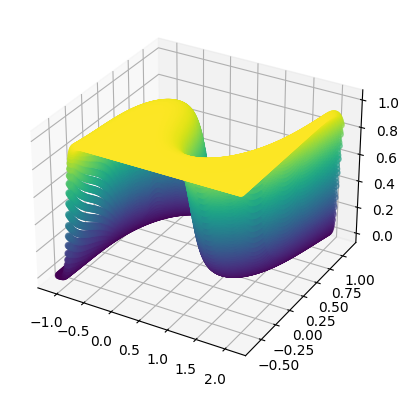

In [17]:
data = read_dataset(dirs[4][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
GA(x_train , y_train , x_test , y_test , 3,dirs[4][-1])

Weights :  [ 0.15882199  9.48097053  3.44098466  0.6225283  -0.64335125  0.42889747
 -0.50662369 -0.16969771  4.36797638  0.05945061  0.39142776  0.07213058
 -1.34978733  0.0789934   0.40372997  3.78220731  0.09823081  0.85374887
 -0.33954595 -6.47394267] 
 accuracy :  0.94


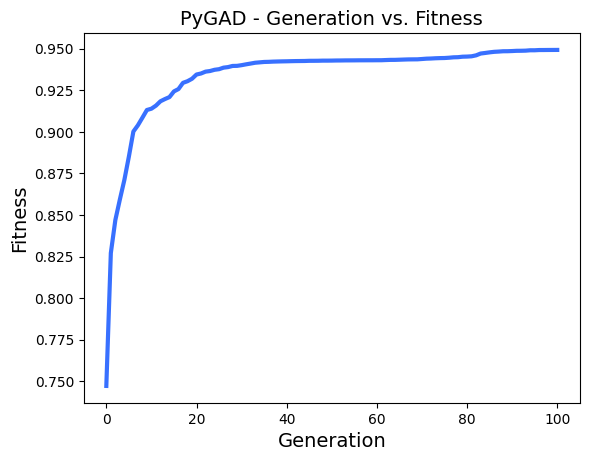

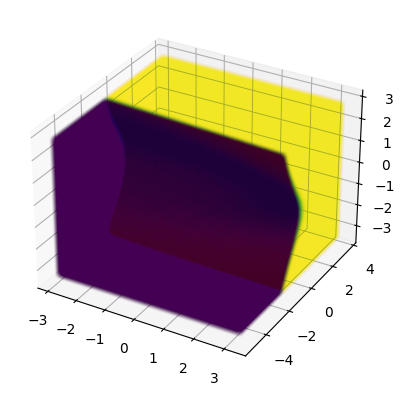

In [18]:
data = read_dataset(dirs[5][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
GA(x_train , y_train , x_test , y_test , 3,dirs[5][-1])

Weights :  [ -0.21634761   0.15281079  -0.09650011  10.46758751   0.19380646
  -0.55852042  10.95558039   0.12340757  10.99959187   0.39317883
  -0.19399532  -0.36417459   0.12017535   0.01737135   0.20224016
  -0.33001513   0.26846351   0.63625032   0.43542811 -12.82827406] 
 accuracy :  0.98


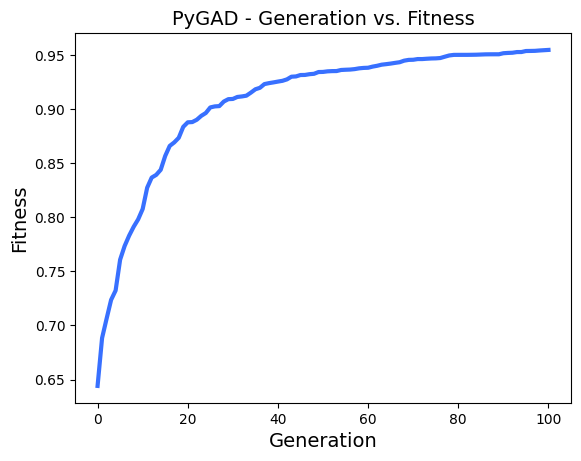

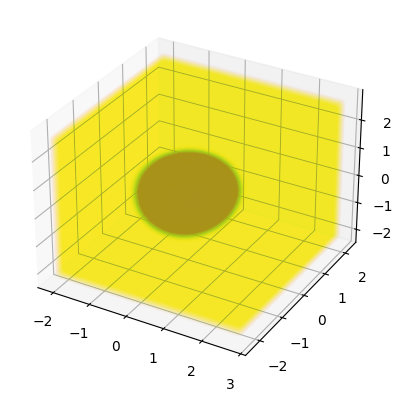

In [20]:
data = read_dataset(dirs[6][0])
x_train , x_test , y_train ,  y_test = train_test_split(data[:,:-1] , data[:,-1] , test_size= 0.1 , random_state=1)
GA(x_train , y_train , x_test , y_test , 3,dirs[6][-1])